<a href="https://colab.research.google.com/github/Sutiksh/TitanicSurvivorPredictor/blob/master/TitanicSurvivalPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline

In [27]:
df = pd.read_csv('./train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
x_df = df[['Pclass','Sex','Age']]
y_df = df[['Survived']]


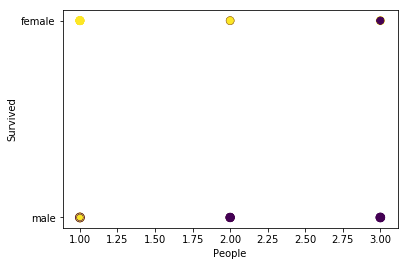

In [29]:
plt.scatter(df.Pclass,df.Sex,df.Age,df.Survived)
plt.xlabel("People")
plt.ylabel("Survived")
plt.show()

In [34]:
df.Sex[df.Sex == 'male'] = 0
df.Sex[df.Sex == 'female'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [48]:
df['Age'].isnull().values.sum()
new_df = df.dropna()
new_df['Age'].isnull().values.sum()

0

In [49]:
x = np.asanyarray(new_df[['Pclass','Sex','Age']])
x[0:5]

array([[1, 1, 38.0],
       [1, 1, 35.0],
       [1, 0, 54.0],
       [3, 1, 4.0],
       [1, 1, 58.0]], dtype=object)

In [50]:
y = np.asanyarray(new_df[['Survived']])
y[0:5]

array([[1],
       [1],
       [0],
       [1],
       [1]])

In [51]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.37225618,  1.03901177,  0.14906507],
       [-0.37225618,  1.03901177, -0.0432295 ],
       [-0.37225618, -0.96245301,  1.17463611],
       [ 3.52047984,  1.03901177, -2.03027338],
       [-0.37225618,  1.03901177,  1.43102886]])

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

print("Train set: ",x_train.shape, y_train.shape)
print("Test set: ",x_test.shape, y_test.shape)

Train set:  (146, 3) (146, 1)
Test set:  (37, 3) (37, 1)


In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

lr = LogisticRegression(C = 1, solver='liblinear').fit(x_train,y_train)
lr

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:

yhat = lr.predict(x_test)
yhat

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1])

In [80]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,yhat))

Accuracy:  0.7567567567567568


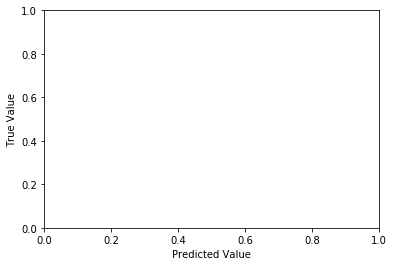

In [85]:
plt.tight_layout()
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show()